In [1]:
from umap_ import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import networkx as nx
import plotly.graph_objects as go
import math
import plotly
sns.set(style='white', context='poster', rc={'figure.figsize':(10,8)})

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
f = df.loc[:, features].values
# Separating out the target
t = df.loc[:,['target']].values
# Standardizing the features
f = StandardScaler().fit_transform(f)

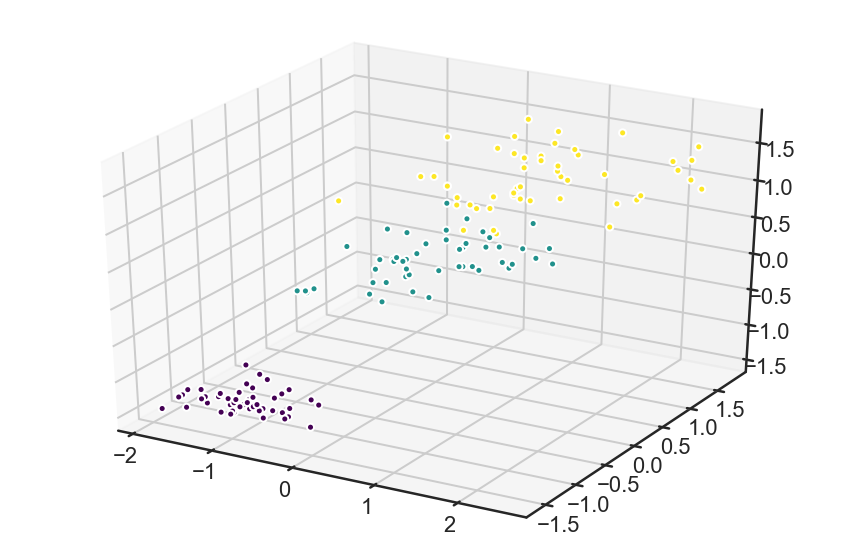

In [90]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = f[:,0]
ys = f[:,2]
zs = f[:,3]
ax.scatter(xs, ys, zs, c= t, cmap = 'viridis', s=50, alpha=1, edgecolors='w')



plt.show()

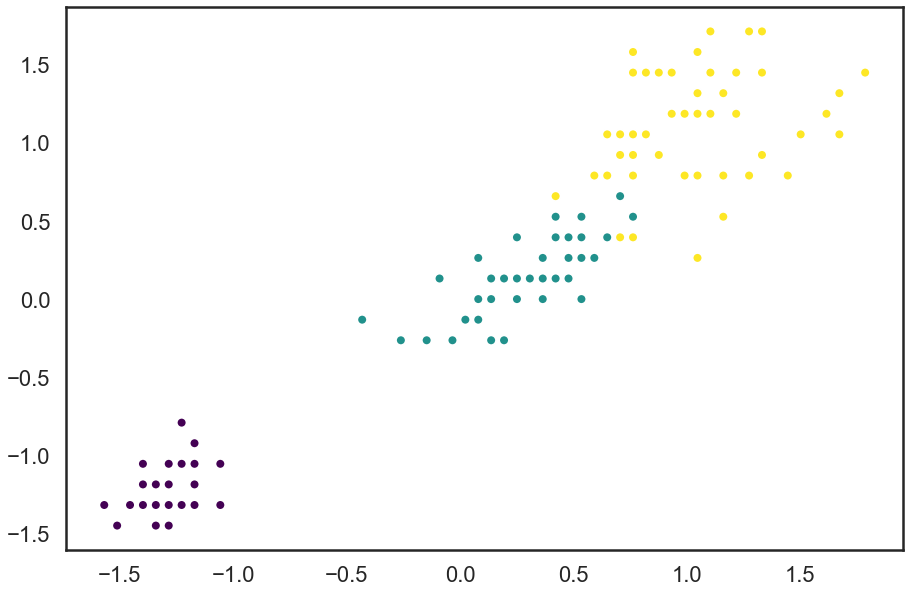

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

plt.scatter(f[:,2],f[:,3],c=t,cmap= 'viridis',s=100, alpha=1, edgecolors='w')

In [124]:
knn_indices_i, knn_dists_i, _ = nearest_neighbors(
            f, n_neighbors=5, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas_i, rhos_i = smooth_knn_dist(
        knn_dists_i, float(15), local_connectivity=float(1),
    )
radii_iris = []
for i in range(len(sigmas_i)):
    radii_iris.append((max(knn_dists_i[i])))
#dcolor_iris = set(radii_iris)
#dcolor_iris
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dcolor_iris = le.fit_transform(radii_iris)
dcolor_iris

Fri Aug 14 11:38:59 2020 Finding Nearest Neighbors
Fri Aug 14 11:38:59 2020 Building RP forest with 6 trees
Fri Aug 14 11:38:59 2020 NN descent for 7 iterations
	 0  /  7
	 1  /  7
	 2  /  7
	 3  /  7
Fri Aug 14 11:38:59 2020 Finished Nearest Neighbor Search


array([  1,   0,  16,  10,  13,  68,  80,   3,  93,   8,  62,  23,  12,
        83, 110, 136,  88,   9,  96,  27,  23,  26,  98,  71,  40,  15,
        18,   5,   5,   7,   4,  48, 118, 123,   6,  32,  52,  46,  65,
         5,  12, 137,  41,  91,  57,  14,  24,   2,  27,  20, 115,  89,
        50,  92,  42,  58, 111, 127,  34, 112, 135,  47, 125,  22,  59,
        63,  43,  69, 124,  29,  97,  66, 102,  75,  42,  28, 104,  72,
        33,  53,  31,  78,  19,  67,  95, 131,  37, 105,  30,  61,  49,
        25,  35, 116,  19,  59,  11,  21, 117,  17,  90,  81, 101,  74,
        56, 107, 133, 103, 129, 134,  79,  76,  45, 122, 128,  85,  38,
       138, 132, 130,  44, 108, 106,  70,  87, 120,  64,  86,  82, 113,
       109, 139, 100,  60, 121, 126,  94,  73,  77,  55,  39,  44,  81,
        36,  84,  54, 114,  51, 119,  99], dtype=int64)

In [125]:
from matplotlib.patches import Circle

def draw_circle(position, radius,
                        ax=None, from_size=0.1, to_size=0.5, n_ellipses=3,
                        alpha=1, color=None,
                        **kwargs):
    ax = ax or plt.gca()
    # Draw the Ellipse
    for nsig in np.linspace(from_size, to_size, n_ellipses):
        ax.add_patch(Circle(position, nsig * radius, alpha=alpha, lw=1, color=color, **kwargs, zorder = 1))

(-3.0, 4.0)

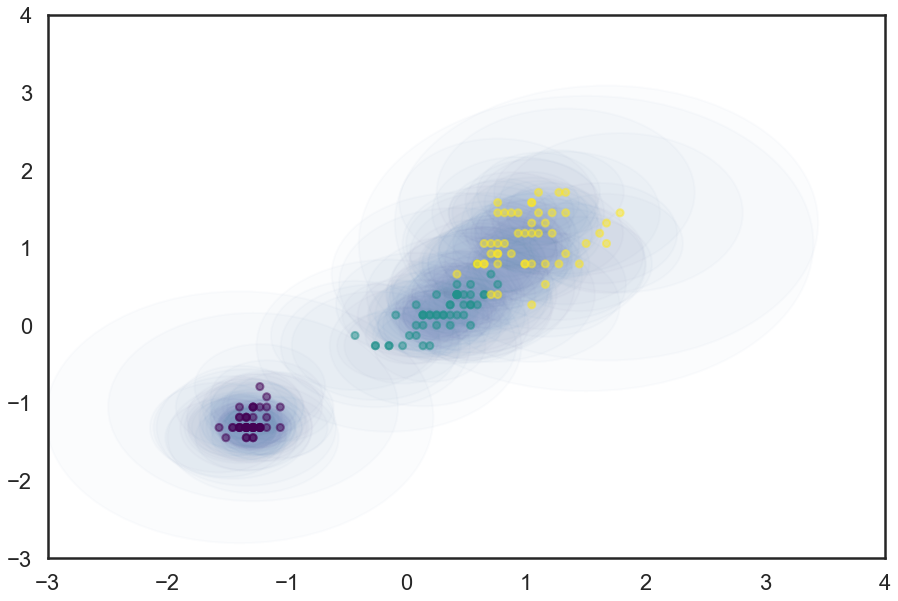

In [126]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)


for i in range(0,len(sigmas_i)):
    circle = plt.Circle((f[i,2], f[i,3]), max(knn_dists_i[i]),fill=True, color ='b', alpha = 0.02)
    ax.add_artist(circle)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.5, zorder =2)
ax.set_xlim((-3,4))
ax.set_ylim((-3,4))

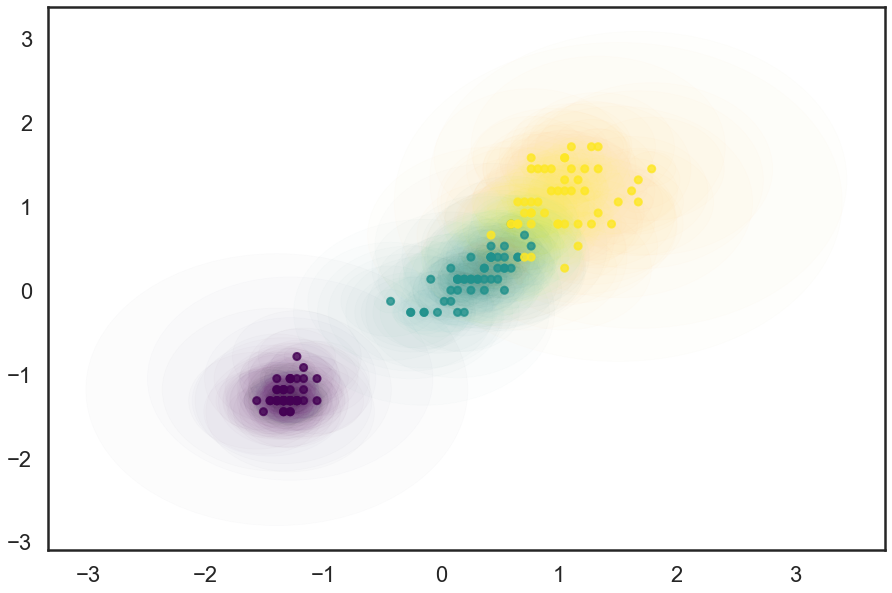

In [127]:
#W.R.T The Cluster
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, 3))
for i in range(len(sigmas_i)):
    pos = f[i, 2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[int(t[i])],
                        from_size=0.2, to_size=1.0, alpha=0.01)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.8, zorder =2)

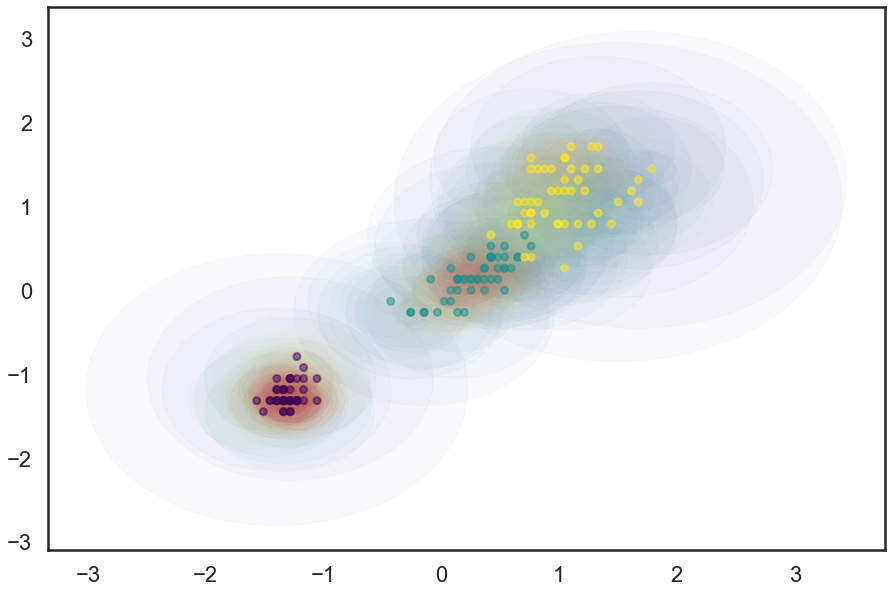

In [128]:
#W.R.T Radius
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('Spectral')(np.linspace(0, 1, max(dcolor_iris)+1))
for i in range(len(sigmas_i)):
    pos = f[i,2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[dcolor_iris[i]],
                        from_size=0.2, to_size=1.0, alpha=0.03)
ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.5, zorder =2)

In [129]:
knn_indices_i, knn_dists_i, _ = nearest_neighbors(
            f, n_neighbors=3, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas_i, rhos_i = smooth_knn_dist(
        knn_dists_i, float(15), local_connectivity=float(1),
    )
radii_iris = []
for i in range(len(sigmas_i)):
    radii_iris.append((max(knn_dists_i[i])))
#dcolor_iris = set(radii_iris)
#dcolor_iris
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dcolor_iris = le.fit_transform(radii_iris)
dcolor_iris

Fri Aug 14 11:40:25 2020 Finding Nearest Neighbors
Fri Aug 14 11:40:25 2020 Building RP forest with 6 trees
Fri Aug 14 11:40:25 2020 NN descent for 7 iterations
	 0  /  7
	 1  /  7
	 2  /  7
	 3  /  7
Fri Aug 14 11:40:25 2020 Finished Nearest Neighbor Search


array([  2,   5,   4,  13,  15,  81,  63,  11,  44,   7,  76,  13,  18,
        44, 106, 120,  87,   0,  86,  17,  33,  40,  99,  82,  41,  20,
        31,   8,  11,   4,   7,  54, 110, 105,   1,  35,  61,  53,  10,
         2,   6, 122,  50,  74,  39,  18,  39,   3,  45,  14,  83,  79,
        36,  85,  58,  25,  80,  65,  32, 104, 117,  52, 114,  29,  56,
        16,  47,  51,  59,  30,  92,  69, 100,  57,  32,  27,  66,  64,
        35,  67,  21,  37,  26,  84,  70, 103,  24, 107,  22,  49,  49,
       102,  51,  98,  34,  19,  19,  29,  98,  12,  95,  60,  78,  89,
        75,  94, 118,  88, 111, 119,  77,  62,  42,  93, 113,  90,  39,
       116, 115, 108,  55,  60,  97,  28,  72, 109,  82,  23,  62, 101,
        97, 121,  91,  71, 100, 112,  49,  68,   9,  38,  48,  46,  60,
        43,  73,  46,  96,  68,  95,  23], dtype=int64)

(-3.0, 4.0)

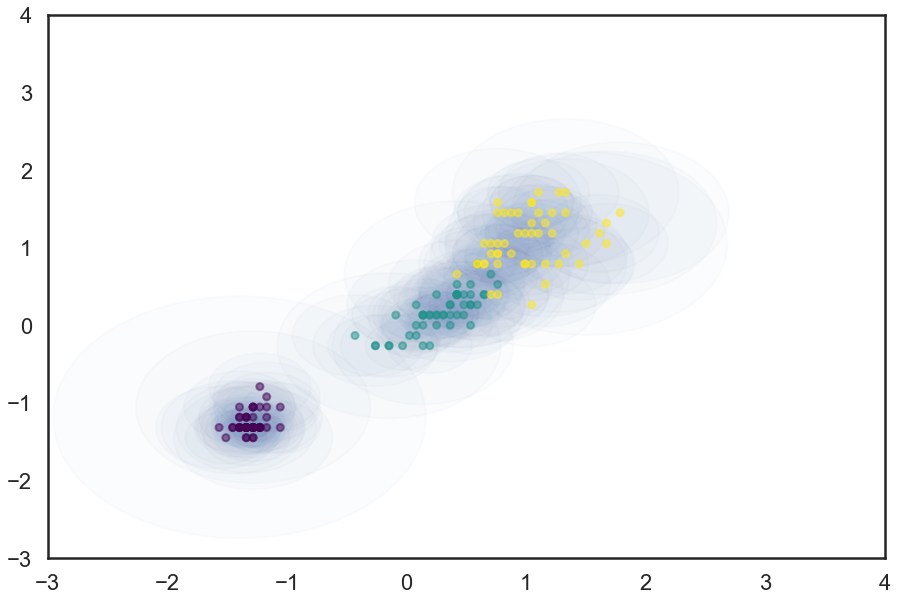

In [130]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)


for i in range(0,len(sigmas_i)):
    circle = plt.Circle((f[i,2], f[i,3]), max(knn_dists_i[i]),fill=True, color ='b', alpha = 0.02)
    ax.add_artist(circle)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.5, zorder =2)
ax.set_xlim((-3,4))
ax.set_ylim((-3,4))

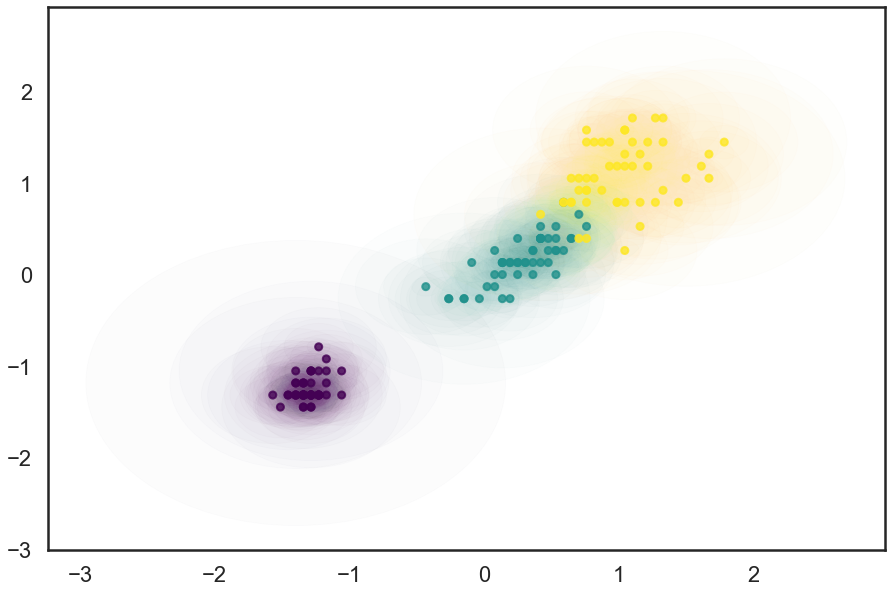

In [131]:
#W.R.T The Cluster
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, 3))
for i in range(len(sigmas_i)):
    pos = f[i, 2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[int(t[i])],
                        from_size=0.2, to_size=1.0, alpha=0.01)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.8, zorder =2)